<h1 style="text-align:center">Steering Control Analysis</h1>
<h3 style="text-align:center">MCHE474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this notebook, we'll examine the response of a simple steering control system, including analysis of its steady-state error to several types of test inputs. We'll use the [Control System Library](http://python-control.readthedocs.io/en/latest/index.html) and work in in the classical control domain

## Notebook Imports

As usual, we'll start by importing the libraries we'll need to work.  These include [NumPy](http://www.numpy.org), [matplotlib](https://matplotlib.org) for plotting, and the Control Systems Library itself. The code cells here will appear unchanged in most of the notebooks we'll use in *MCHE474*.

In [1]:
# Grab all of the NumPy functions with namespace np
import numpy as np              

Next, we'll import matplotlib.

In [2]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

Finally we'll import the Control Systems Library. We don't specify a shorthand namespace, so we'll need to preface any commands from it with `control.`.

In [3]:
import control # This will import the control library.  

Now that we've imported the necessary libraries, let's walk through the basic analysis of a simple steering control system, roughly mirroring Example 5.3 of  [*Modern Control Systems (13th Edition)* by Richard Dorf and Robert Bishop](http://amzn.com/0134407628), the current (as of Fall 2017) textbook for *MCHE474*.

## System Definition

The proposed system has a fairly standard form, with unity feedback, so it can be represented by the block diagram in Figure 1, where the reference command, $R(s)$, represents the desired heading, and the output, $Y(s)$, is the actual heading.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/blockDiagram_normalFeedback.png" alt="Proposed Steering System" width=50%><br>
    <strong>Figure 1: Proposed Steering System</strong>
</p>

The system to be steered is the plant, $G_p$. In this case:

$ \quad G_p(s) = \frac{K}{\tau s + 1} $

and the proposed controller, $G_c$, has the form:

$ \quad G_c(s) = k_p + \frac{k_i}{s} $

To define the system, we'll use some placeholder constants for $K$, $\tau$, and the controller gains, $k_p$ and $k_i$. Later, we'll look at the effects of changing these.

In [4]:
K = 1.0    # plant gain, K
tau = 1.0  # plant time constant

# Define the numerator and denominator of the plant transfer function
num_p = [K]
den_p = [tau, 1]

Now, that these are defined, we can pass them to the `tf` function of the library. Remember that since `tf` is a function in the `control` module, we need to use `control.tf()` to call it. We'll assign the variable `sys` to hold transfer function returned. 

In [5]:
# Define the transfer function form of the system defined by num and den
Gp = control.tf(num_p, den_p)

We can check that the transfer function is defined correctly by printing `sys`.

In [6]:
print(Gp)


  1
-----
s + 1



Now, let's define the control system block, $G_c$.

In [7]:
kp = 5.0    # The proporional gain
ki = 1.0    # The integral gain

# Define the numerator and denominator of the controller transfer function
num_c = [kp, ki]
den_c = [1, 0]

# Now, we can define the controller transfer function
Gc = control.tf(num_c, den_c)

# and check that it's correct by printing it out
print(Gc)


5 s + 1
-------
   s



We can calculate both the open-loop and closed-loop transfer functions using the control systems toolbox.

For the open-loop transfer function, the two blocks are just connected in series.

In [8]:
# Calculate the series connection
openLoop_sys = control.series(Gc, Gp)

# print it out to check it
print('The open-loop transfer function is {}'.format(openLoop_sys))

The open-loop transfer function is 
5 s + 1
-------
s^2 + s



Now, we can close the feedback loop to define the closed-loop transfer function.

In [9]:
# Calculate the closed-loop transfer function
sys_closedLoop = control.feedback(openLoop_sys)

# Then print out the result
print('The closed-loop transfer function is {}'.format(sys_closedLoop))

The closed-loop transfer function is 
   5 s + 1
-------------
s^2 + 6 s + 1



#### Step Response
The function to simluate the system response to a step input is:

    control.step_response()

where we have to pass the system and have the option of passing other information. More information on it can be found [here](http://python-control.readthedocs.io/en/latest/generated/control.step_response.html#control.step_response).

For this system, let's simulate a step response with zero initial conditions (*i.e.* The system is at rest when the input is applied.)

In [10]:
# First define the time vector to simulate the response over
t = np.linspace(0, 20, 2001)

# Then, we'll use the step_response() function to get the response to a unity-magnitude step input
time_step, step_response = control.step_response(sys_closedLoop, t)

We can now plot this reponse using the arrays returned.

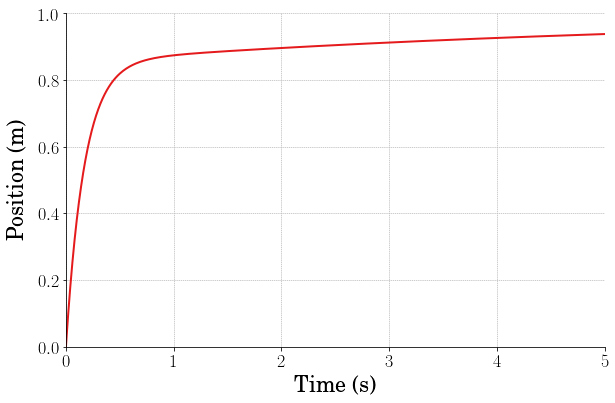

In [11]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_step, step_response, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
plt.xlim(0, 5)
plt.ylim(0, 1)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('SteeringSystem_step_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

The repsponse seems like it might have steady-state error. However, if we look at the response over a larger time scale, we see that the error does go to zero. This is what we should expect for a *Type-1 System* response to a step input. 

To eliminate this error faster, we can increase the integral gain, $k_i$. A good exercise would be to put in different values for it above, then re-run the system definition, simlutions, and plotting to examine the effect.

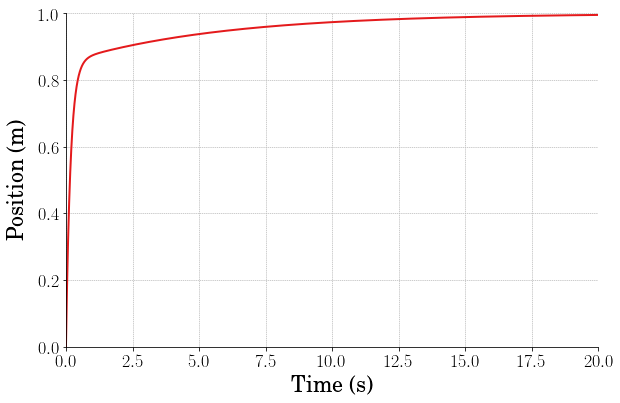

In [12]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_step, step_response, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
plt.xlim(0, 20)
plt.ylim(0, 1)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('SteeringSystem_step_response_longTime.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">


#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [13]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())